**NOTES:**

*From: Is the area under an ROC curve a validmeasure of the performance of a screeningor diagnostic test?*
* With different standard deviations in affected and unaffected individuals, the ROC curve crosses the diagonal, with the anomalous implication that at very high FPRs the FPR is greater than the DR.

*From https://stats.stackexchange.com/questions/54525/roc-curve-crossing-the-diagonal*
* You get a nice symmetric ROC plot only when standard deviations for both outcomes are the same.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve

sns.set()
%matplotlib inline

# Dropped ICC and SCC + divided HPV group B + Biomarkers

In [4]:
avg_auc_bm = np.load('./../../data_source/results/performance_curves/icc_scc_hpv_b_biomarkers_only/avg_roc_aucs.npy')
avg_tpr_bm = np.load('./../../data_source/results/performance_curves/icc_scc_hpv_b_biomarkers_only/avg_roc_tprs.npy')
std_tpr_bm = np.load('./../../data_source/results/performance_curves/icc_scc_hpv_b_biomarkers_only/std_roc_tprs.npy')

avg_auc_ms = np.load('./../../data_source/results/performance_curves/icc_scc_hpv_b_all_features_results/avg_roc_aucs.npy')
avg_tpr_ms = np.load('./../../data_source/results/performance_curves/icc_scc_hpv_b_all_features_results/avg_roc_tprs.npy')
std_tpr_ms = np.load('./../../data_source/results/performance_curves/icc_scc_hpv_b_all_features_results/std_roc_tprs.npy')

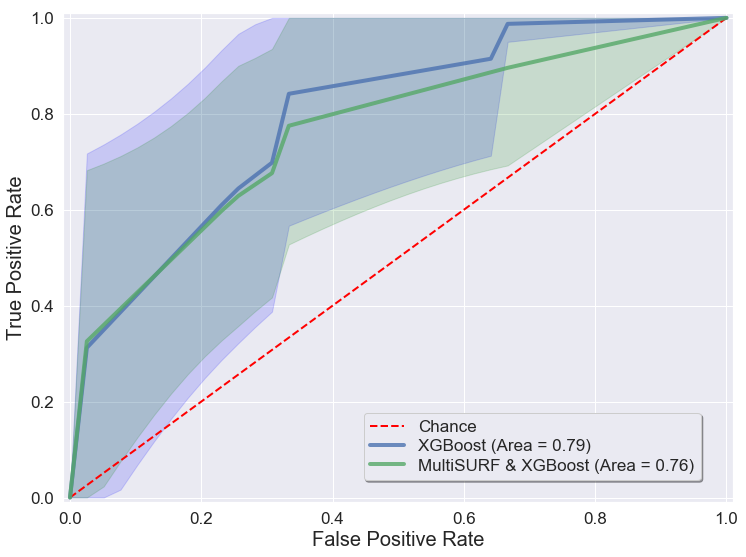

In [37]:
# NB:
avg_fpr = np.linspace(0, 1, 40)
    

plt.figure(figsize=(12, 9))
plt.plot([0, 1], [0, 1], label='Chance', color='red', linestyle='--', linewidth=2)

plt.plot(
    avg_fpr, avg_tpr_bm, c='b', alpha=0.8, lw=4,
    label=f'XGBoost (Area = {np.round(avg_auc_bm, 2)})'
)
tprs_upper = np.minimum(avg_tpr_bm + std_tpr_bm, 1)
tprs_lower = np.maximum(avg_tpr_bm - std_tpr_bm, 0)
plt.fill_between(avg_fpr, tprs_lower, tprs_upper, alpha=0.15, color='blue')


plt.plot(
    avg_fpr, avg_tpr_ms, c='g', alpha=0.8, lw=4,
    label=f'MultiSURF & XGBoost (Area = {np.round(avg_auc_ms, 2)})'
)
tprs_upper = np.minimum(avg_tpr_ms + std_tpr_ms, 1)
tprs_lower = np.maximum(avg_tpr_ms - std_tpr_ms, 0)
plt.fill_between(avg_fpr, tprs_lower, tprs_upper, alpha=0.15, color='green')

plt.xlim([-0.01, 1.01]); plt.ylim([-0.01, 1.01])

plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.7, 0.2),
    fancybox=True, 
    shadow=True, 
    fontsize=17,
    ncol=1,
    labelspacing=0.25
)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.savefig(
    './../../figures/performance_curves/xgb_roc.png',
    bbox_inches='tight',
    dpi=100, 
)